# **Conect Google Colab with Driver**

---



In [ ]:
from google.colab import files
files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
import seaborn as sns

# **DataSets**

In [ ]:
data = pd.read_csv('creditcard_sampledata_3.csv',sep=',')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5050 non-null   float64
 1   V2      5050 non-null   float64
 2   V3      5050 non-null   float64
 3   V4      5050 non-null   float64
 4   V5      5050 non-null   float64
 5   V6      5050 non-null   float64
 6   V7      5050 non-null   float64
 7   V8      5050 non-null   float64
 8   V9      5050 non-null   float64
 9   V10     5050 non-null   float64
 10  V11     5050 non-null   float64
 11  V12     5050 non-null   float64
 12  V13     5050 non-null   float64
 13  V14     5050 non-null   float64
 14  V15     5050 non-null   float64
 15  V16     5050 non-null   float64
 16  V17     5050 non-null   float64
 17  V18     5050 non-null   float64
 18  V19     5050 non-null   float64
 19  V20     5050 non-null   float64
 20  V21     5050 non-null   float64
 21  V22     5050 non-null   float64
 22  

# **Exploratory Data Analysis(Phân tích dữ liệu khám phá)**

In [ ]:
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal (Bình thường)", "Fraud (Gian lận)"]

In [ ]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency ( Tính thường xuyên ) ')

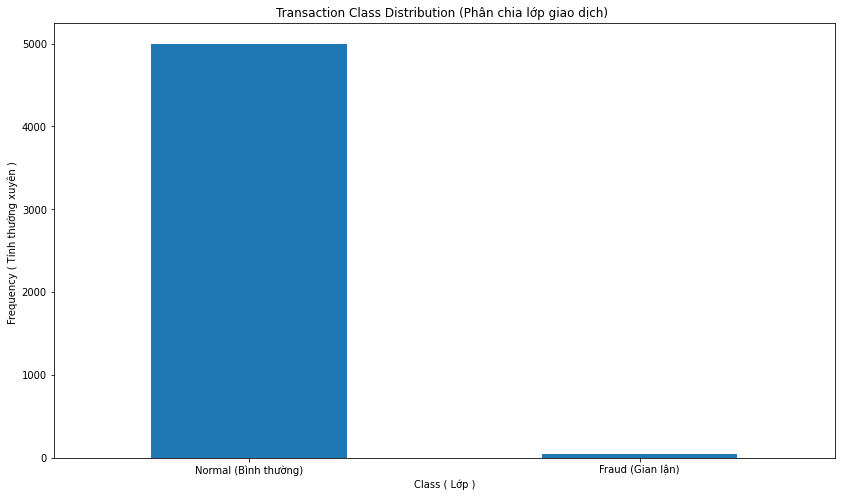

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution (Phân chia lớp giao dịch) ")

plt.xticks(range(2), LABELS)

plt.xlabel("Class ( Lớp )")

plt.ylabel("Frequency ( Tính thường xuyên ) ")

In [ ]:
# lấy giá trị trên tập dữ liệu Gian lận và tập dữ liệu Bình thường
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [ ]:
fraud.shape

(50, 30)

In [ ]:
normal.shape

(5000, 30)

In [ ]:
fraud.Amount.describe()

count      50.000000
mean      113.469000
std       234.409091
min         0.000000
25%         1.000000
50%        10.605000
75%       105.172500
max      1402.160000
Name: Amount, dtype: float64

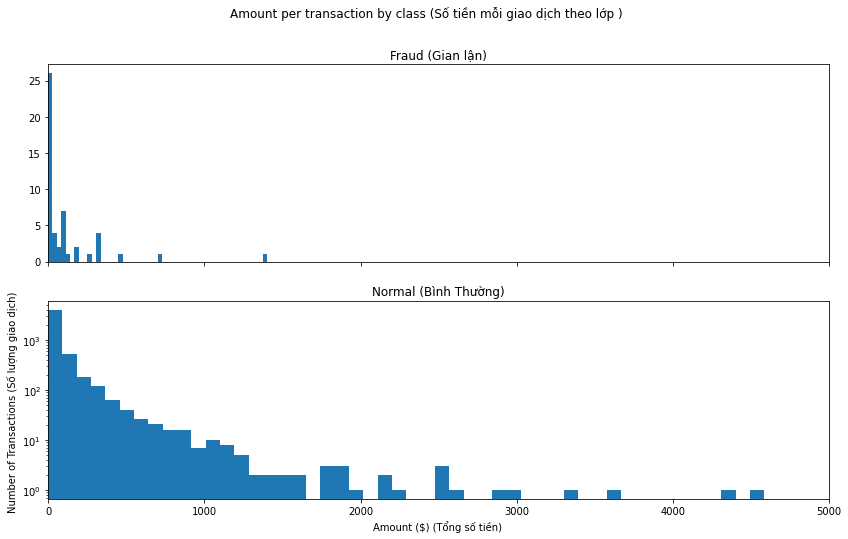

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class (Số tiền mỗi giao dịch theo lớp )')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud (Gian lận)')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal (Bình Thường)')
plt.xlabel('Amount ($) (Tổng số tiền) ')
plt.ylabel('Number of Transactions (Số lượng giao dịch) ')
plt.xlim((0, 5000))
plt.yscale('log')
plt.show();

In [ ]:
# Lấy một số mẫu dữ liệu
data1= data.sample(frac = 0.1,random_state=1)
data1.shape

(505, 30)

In [ ]:
# Xác định số lượng giao dịch gian lận và giao dịch hợp lệ trong tập dữ liệu
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.01609657947686117
Fraud Cases : 8
Valid Cases : 497


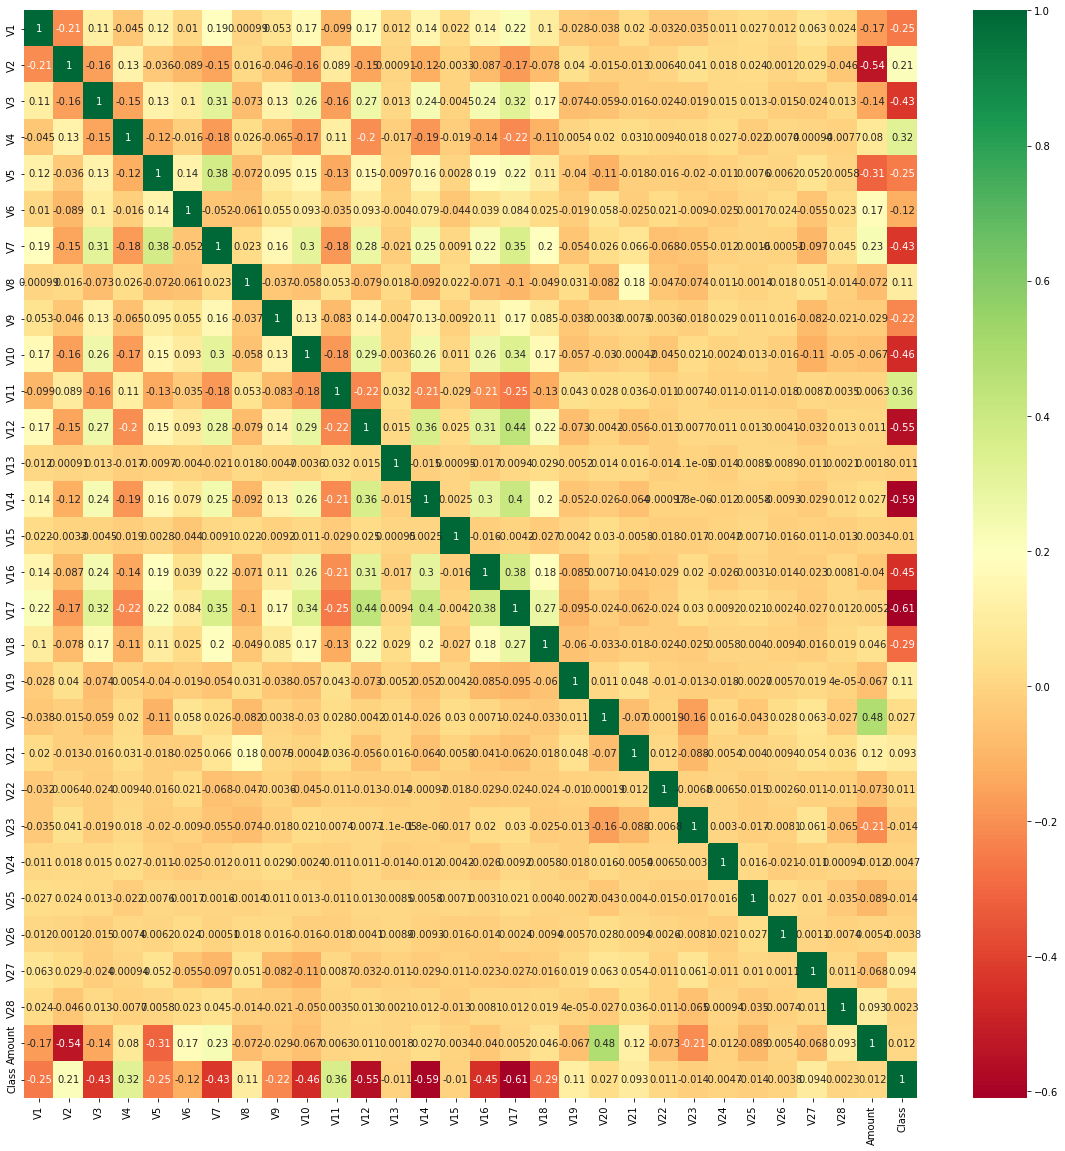

In [ ]:
# nhận các mối tương quan của từng tính năng trong tập dữ liệu
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# vẽ heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Load data**

In [ ]:
# Tạo tính năng độc lập và tính năng phụ thuộc 
columns = data1.columns.tolist()
# Lọc các cột để loại bỏ dữ liệu chúng tôi không muốn
columns = [c for c in columns if c not in ["Class"]]
# Lưu trữ biến mà mình đang dự đoán
target = "Class"
# Xác định trạng thái ngẫu nhiên 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# In các hình dạng của X & Y
print(X.shape)
print(Y.shape)

(505, 29)
(505,)


# **Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report, confusion_matrix

# tách dữ liệu thành train test dataset
x_train,x_test,y_train,y_test = train_test_split(X, Y ,test_size= 0.3,random_state=0)

# **Build model RandomForestClassifier**

In [ ]:
classifier_1 = RandomForestClassifier()

# model 
classifier_1 = RandomForestClassifier(n_estimators=20,criterion='entropy', random_state=0,max_depth=10)
classifier_1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)

## **Predict**

In [ ]:
y_pred_1 = classifier_1.predict(x_test)

In [ ]:
print('Classifcation report:\n', classification_report(y_test, y_pred_1))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_1)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       147
           1       1.00      0.40      0.57         5

    accuracy                           0.98       152
   macro avg       0.99      0.70      0.78       152
weighted avg       0.98      0.98      0.98       152

Confusion matrix:
 [[147   0]
 [  3   2]]


## **Visualizing**

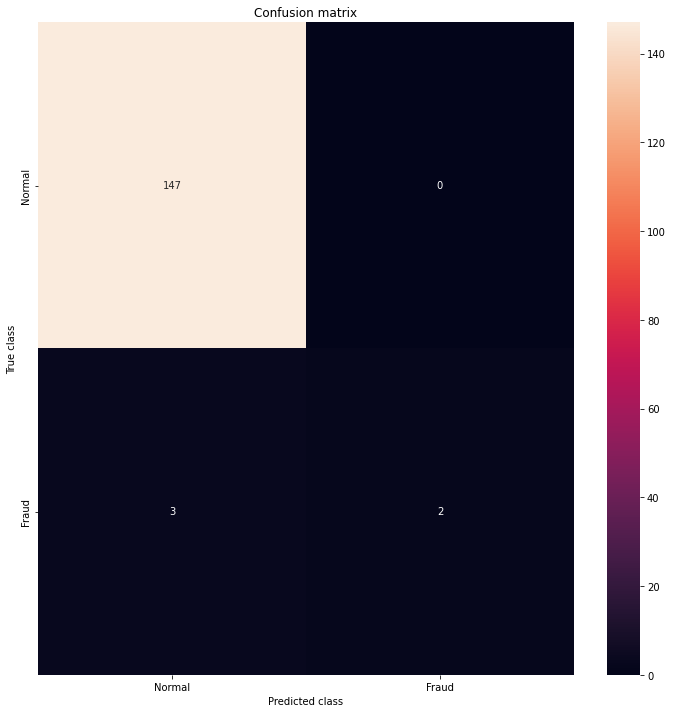

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_1) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

# **Build model Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_2 = LogisticRegression()
classifier_2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## **Predict**

In [ ]:
y_pred_2 = classifier_2.predict(x_test)

In [ ]:
print('Classifcation report:\n', classification_report(y_test, y_pred_2))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_2)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       147
           1       1.00      0.40      0.57         5

    accuracy                           0.98       152
   macro avg       0.99      0.70      0.78       152
weighted avg       0.98      0.98      0.98       152

Confusion matrix:
 [[147   0]
 [  3   2]]


## **Visualizing**

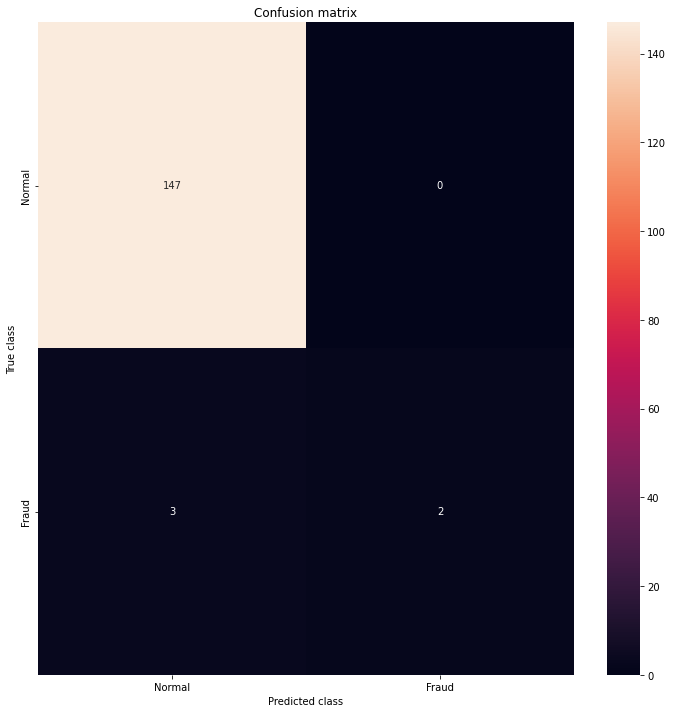

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_2) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

# **Build model DecisionTreeClassifier**

In [ ]:
from sklearn import tree
classifier_3 = tree.DecisionTreeClassifier()
classifier_3 = classifier_3.fit(X, Y)

## **Predict**

In [ ]:
y_pred_3 = classifier_3.predict(x_test)

In [ ]:
print('Classifcation report:\n', classification_report(y_test, y_pred_3))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_3)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00         5

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

Confusion matrix:
 [[147   0]
 [  0   5]]


## **Visualizing**

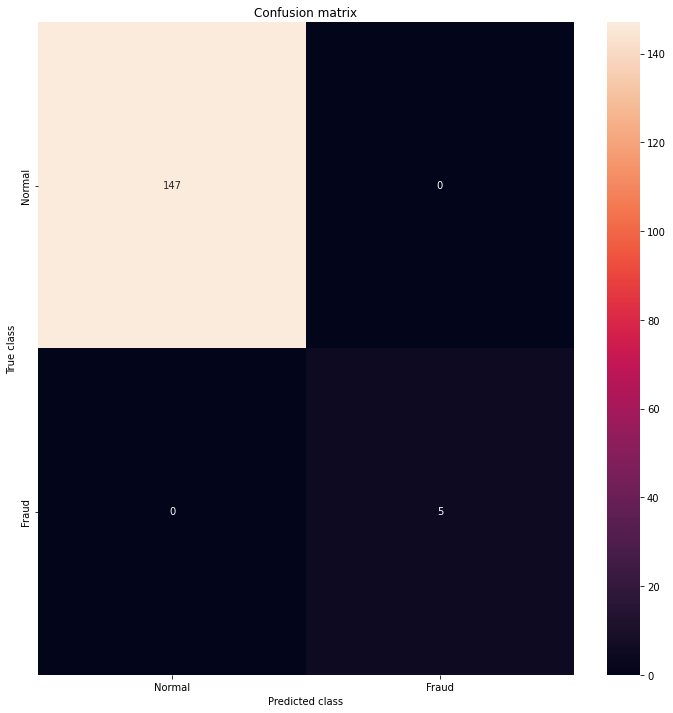

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_3) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

# **Build model XGBoosting**

In [ ]:
import xgboost as xgb
classifier_4 = xgb.XGBRegressor(objective="reg:linear", random_state=42)
classifier_4.fit(X, Y)

[16:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

## **Predict**

In [ ]:
y_pred4 = classifier_4.predict(x_test)

In [ ]:
y_pred_4 = []
for i in y_pred4 :
  if(i < 0):
    y_pred_4.append(0)
  else :
    y_pred_4.append(1)

In [ ]:
print('Classifcation report:\n', classification_report(y_test, y_pred_4))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_4)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       147
           1       0.45      1.00      0.62         5

    accuracy                           0.96       152
   macro avg       0.73      0.98      0.80       152
weighted avg       0.98      0.96      0.97       152

Confusion matrix:
 [[141   6]
 [  0   5]]


## **Visualizing**

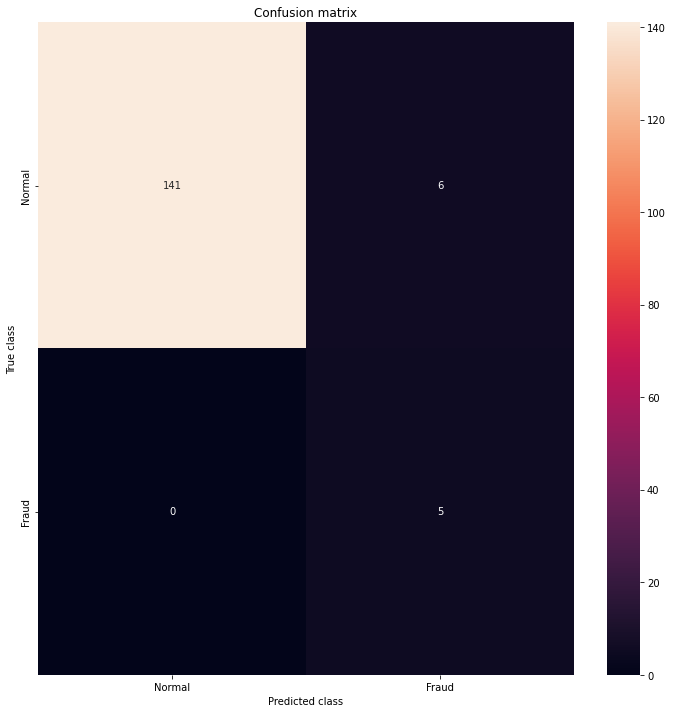

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_4) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()